In [ ]:
pip instll imblearn

In [1]:
import os
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE,ADASYN

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.tree import DecisionTreeClassifier,export_graphviz,plot_tree
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,recall_score,precision_score,classification_report
from sklearn.preprocessing import LabelEncoder,StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer,make_column_transformer

sns.set_style('darkgrid')

Using TensorFlow backend.


In [2]:
os.chdir('/home/sadil/Data Science Projects/Bank')
os.listdir()

['bank-additional-full.csv',
 'bank-data',
 'train.csv',
 'bank-additional-names.txt']

In [12]:
train=pd.read_csv('bank-additional-full.csv',delimiter=';')
info=pd.read_fwf('bank-additional-names.txt')

del train['contact']
del train['day_of_week']

#del train['emp.var.rate']

In [13]:
train.head()

,age,job,marital,education,default,housing,loan,month,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,may,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,may,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,may,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,may,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,may,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [14]:
train['default']=train['default'].replace({'unknown':'no'})
train['housing']=train['housing'].replace({'unknown':'no'})
train['loan']=train['loan'].replace({'unknown':'no'})

In [15]:
train['pdays']=train['pdays'].replace({999:0})

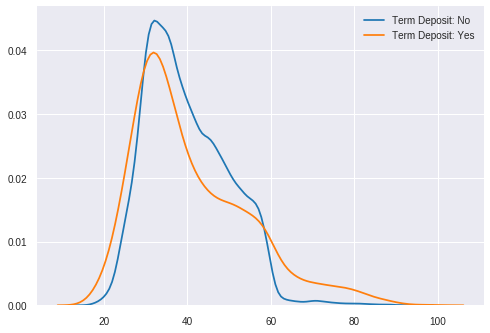

In [16]:
sns.kdeplot(train['age'][train.y=='no'])
sns.kdeplot(train['age'][train.y=='yes'])
plt.legend(['Term Deposit: No','Term Deposit: Yes'])

 $Similar\; categories\; are\; named\; same$

In [17]:
train['job']=train['job'].replace({'entrepreneur':'self-employed','retired':'unemployed','student':'unemployed'})
train['education']=train['education'].replace({'basic.4y':'basic','basic.6y':'basic','basic.9y':'basic',
                                              'illiterate':'basic','professional.course':'basic'})

In [18]:
# Index of the "yes" class
additional=train[train.y=='yes'].index

In [19]:
y=train.pop('y')
y=y.replace({'no':0,'yes':1})

# Observation
> No missing values

> Data is Skewed

# Data Preprocessing

In [20]:
obj=list(train.dtypes[train.dtypes==object].index) # List of all column names with object data types

In [21]:
train.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,0.221229,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,1.348874,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,0.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,0.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,0.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,27.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


## One Hot Encoding

In [22]:
ct = ColumnTransformer(
   [("norm2", OneHotEncoder(drop='first'),obj)
  ])

temp=ct.fit_transform(train)
temp=pd.DataFrame(temp.toarray())

train=train.drop(obj,axis=1)
train=pd.concat([train,temp],axis=1,ignore_index=False)

## Scaling

In [23]:
st=StandardScaler()
train=pd.DataFrame(st.fit_transform(train))

## Spliting the Dataset into train and test

In [24]:
from imblearn.over_sampling import SMOTE

In [25]:
sm=SMOTE()
train,y=sm.fit_resample(train,y)

In [26]:
x_train,x_test,y_train,y_test=train_test_split(train,y,random_state=0)

## Defining Important Functions

In [67]:
def cross_validation(estimator,data,label):
    accuracies=cross_val_score(estimator,X=data,y=label,scoring='recall',cv=10)
    print ('Recall Mean:',accuracies.mean(),'Recall Variance:',accuracies.var())

def evaluate(estimator,data,label):
    acc=classification_report(label,estimator.predict(data))
    conf=confusion_matrix(label,estimator.predict(data))
    
    
    print('Confusion Matrix:\n',conf)
    print('Classification Report:\n',acc)

# ML Models

## Naive Bayes

In [68]:
x_train.shape,y_train.shape

((54822, 38), (54822,))

In [69]:
bayes=GaussianNB()
bayes.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [70]:
evaluate(bayes,x_train,y_train)

Confusion Matrix:
 [[17947  9584]
 [ 2886 24405]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.65      0.74     27531
           1       0.72      0.89      0.80     27291

    accuracy                           0.77     54822
   macro avg       0.79      0.77      0.77     54822
weighted avg       0.79      0.77      0.77     54822



In [71]:
evaluate(bayes,x_test,y_test)

Confusion Matrix:
 [[5844 3173]
 [ 995 8262]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.65      0.74      9017
           1       0.72      0.89      0.80      9257

    accuracy                           0.77     18274
   macro avg       0.79      0.77      0.77     18274
weighted avg       0.79      0.77      0.77     18274



In [72]:
cross_validation(bayes,x_train,y_train)

Recall Mean: 0.8930048173397387 Recall Variance: 7.585227223300398e-05


## Support Vector Machines

In [73]:
svm=SVC()
svm.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [74]:
evaluate(svm,x_train,y_train)

Confusion Matrix:
 [[23847  3684]
 [ 1063 26228]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.87      0.91     27531
           1       0.88      0.96      0.92     27291

    accuracy                           0.91     54822
   macro avg       0.92      0.91      0.91     54822
weighted avg       0.92      0.91      0.91     54822



In [75]:
evaluate(svm,x_test,y_test)

Confusion Matrix:
 [[7715 1302]
 [ 390 8867]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.86      0.90      9017
           1       0.87      0.96      0.91      9257

    accuracy                           0.91     18274
   macro avg       0.91      0.91      0.91     18274
weighted avg       0.91      0.91      0.91     18274



In [76]:
%%time
cross_validation(svm,x_train,y_train)

Recall Mean: 0.9569820151754926 Recall Variance: 4.04597581995981e-05
CPU times: user 11min 9s, sys: 385 ms, total: 11min 10s
Wall time: 11min 11s


## Decision Tree

In [77]:
tree=DecisionTreeClassifier(max_depth=12,criterion='gini')
tree.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=12, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [78]:
print(classification_report(y_train,tree.predict(x_train)))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95     27531
           1       0.93      0.96      0.95     27291

    accuracy                           0.95     54822
   macro avg       0.95      0.95      0.95     54822
weighted avg       0.95      0.95      0.95     54822



In [79]:
evaluate(tree,x_test,y_test)

Confusion Matrix:
 [[8110  907]
 [ 583 8674]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.90      0.92      9017
           1       0.91      0.94      0.92      9257

    accuracy                           0.92     18274
   macro avg       0.92      0.92      0.92     18274
weighted avg       0.92      0.92      0.92     18274



In [80]:
cross_validation(tree,x_train,y_train)

Recall Mean: 0.9362795882510063 Recall Variance: 2.159817926900107e-05


In [81]:
import graphviz
dot_data=export_graphviz(tree,filled=True,out_file=None,special_characters=True)
graph=graphviz.Source(dot_data,engine='dot')
graph

In [82]:
imp=pd.Series(tree.feature_importances_)

In [83]:
not_imp_features=list(imp[imp<0.001].index)

In [84]:
imp.values

array([1.86994936e-02, 4.94886207e-01, 4.84410972e-02, 5.14806119e-03,
       1.98214995e-03, 1.42509869e-02, 8.04935773e-03, 8.34673014e-02,
       5.76608740e-02, 2.03055298e-01, 1.56132565e-03, 1.45175223e-03,
       1.41042653e-03, 1.36655287e-03, 1.19232917e-03, 1.95897215e-03,
       6.33582641e-03, 4.65053823e-04, 2.24531376e-03, 1.87605589e-03,
       8.25840488e-05, 1.43255189e-03, 5.55723518e-03, 6.03809750e-04,
       0.00000000e+00, 8.78511894e-03, 3.65699840e-03, 2.83655105e-04,
       7.71682614e-05, 7.40659047e-04, 0.00000000e+00, 2.12177406e-04,
       2.69333177e-03, 3.87739368e-04, 9.72707350e-03, 6.87613830e-04,
       3.69324552e-03, 5.87460244e-03])

In [85]:
x_train.shape,len(not_imp_features)

((54822, 38), 11)

In [86]:
x_train_2=x_train.drop(labels=not_imp_features,axis=1)
x_test_2=x_test.drop(labels=not_imp_features,axis=1)

### Decision Tree after feature_selection

In [87]:
tree=DecisionTreeClassifier(max_depth=11,criterion='gini')
tree.fit(x_train_2,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=11, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [88]:
evaluate(tree,x_test_2,y_test)

Confusion Matrix:
 [[8073  944]
 [ 597 8660]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.90      0.91      9017
           1       0.90      0.94      0.92      9257

    accuracy                           0.92     18274
   macro avg       0.92      0.92      0.92     18274
weighted avg       0.92      0.92      0.92     18274



In [89]:
cross_validation(tree,x_train_2,y_train)

Recall Mean: 0.9401635533148909 Recall Variance: 3.712515798228757e-05


### Naive Bayes after feature selection

In [90]:
bayes=GaussianNB()
bayes.fit(x_train_2,y_train)

evaluate(bayes,x_test_2,y_test)

Confusion Matrix:
 [[7858 1159]
 [3763 5494]]
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.87      0.76      9017
           1       0.83      0.59      0.69      9257

    accuracy                           0.73     18274
   macro avg       0.75      0.73      0.73     18274
weighted avg       0.75      0.73      0.73     18274



In [91]:
cross_validation(bayes,x_train_2,y_train)

Recall Mean: 0.5923195980762855 Recall Variance: 0.00010294922060553996


### SVM after feature selection

In [92]:
%%time
svm=SVC()
svm.fit(x_train_2,y_train)

CPU times: user 1min 2s, sys: 49.8 ms, total: 1min 2s
Wall time: 1min 3s


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [93]:
%%time
evaluate(svm,x_test_2,y_test)

Confusion Matrix:
 [[7720 1297]
 [ 352 8905]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.86      0.90      9017
           1       0.87      0.96      0.92      9257

    accuracy                           0.91     18274
   macro avg       0.91      0.91      0.91     18274
weighted avg       0.91      0.91      0.91     18274

CPU times: user 20 s, sys: 0 ns, total: 20 s
Wall time: 20.1 s


In [94]:
%%time
cross_validation(svm,x_train_2,y_train)

Recall Mean: 0.9602798996532964 Recall Variance: 2.989836199873894e-05
CPU times: user 8min 46s, sys: 223 ms, total: 8min 47s
Wall time: 8min 48s
